# Plot mean Average Precision (mAP) vs q-value with names

In [16]:
%cd G:\My Drive\GitHub\scripts_notebooks_fossa
%pip install -e .

G:\My Drive\GitHub\scripts_notebooks_fossa
Obtaining file:///G:/My%20Drive/GitHub/scripts_notebooks_fossa
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: scripts-fossa
    Found existing installation: scripts-fossa 1.0
    Uninstalling scripts-fossa-1.0:
      Successfully uninstalled scripts-fossa-1.0
  Running setup.py develop for scripts-fossa
Note: you may need to restart the kernel to use updated packages.


## Inputs

- From the chosen root path, it will find the name of the folders inside the root. 
- It will open all the folders and get the metrics_level_1_ref.paquet from it;
- It will plot mean average precision with all the compounds names and with a chosen plot title.

In [1]:
import pandas as pd
import easygui as eg
import os
from plot_map import mean_ap_plot

In [2]:
root, dirlist, output = mean_ap_plot.inputs_map()

List of directories ['technical_original', 'technical_pycombat_perrowperplate', 'technical_pycombat_perplate', 'technical_pycombat_percolperplate']
List of titles: ['Normalized and Feature Selected', 'PyCombat: X', 'PyCombat:Y', 'PyCombat:Z']


G:\My Drive\2022_09_09_LiveCellPainting_fossa_Cimini\analysis\2022_06_07_DILI\evalzoo_matric\technical_original


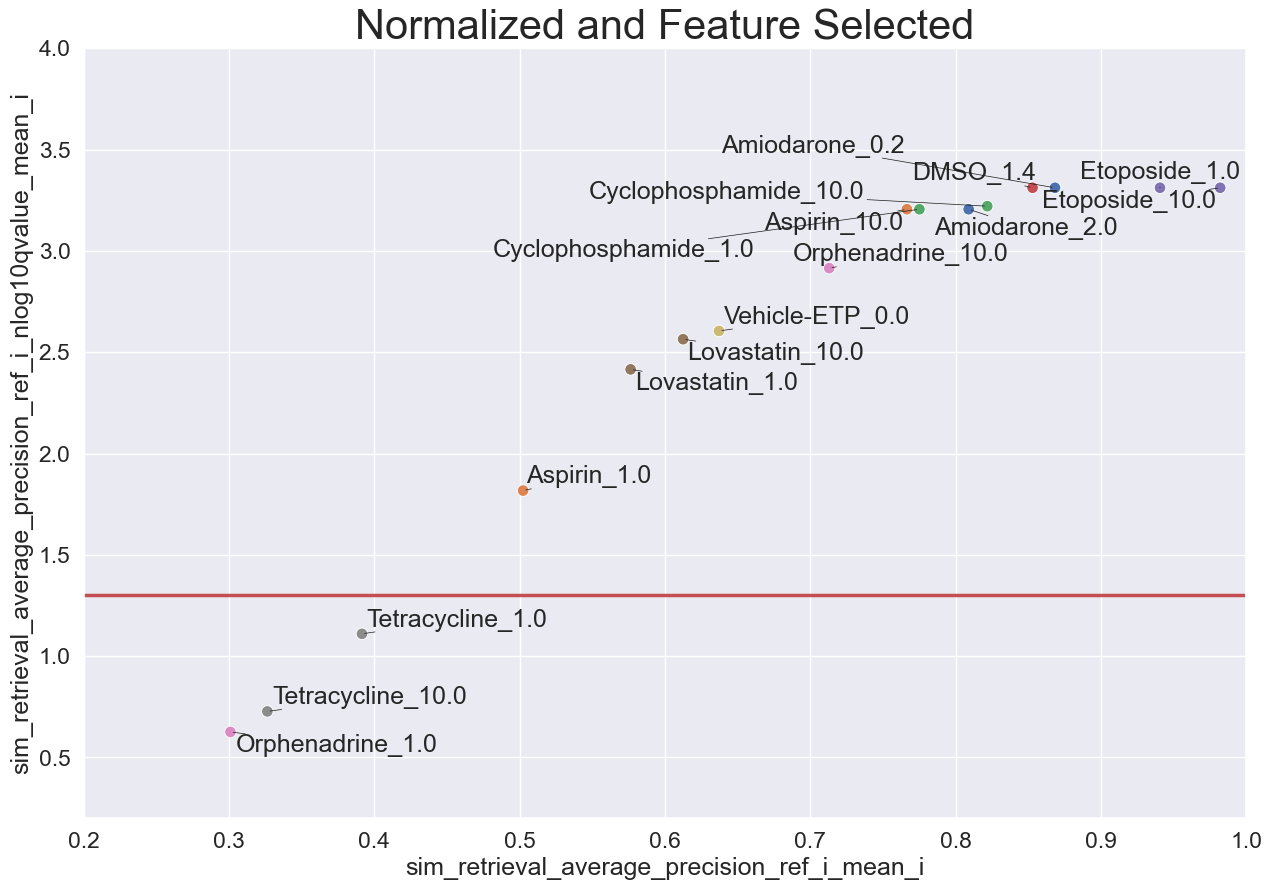

G:\My Drive\2022_09_09_LiveCellPainting_fossa_Cimini\analysis\2022_06_07_DILI\evalzoo_matric\technical_pycombat_perrowperplate


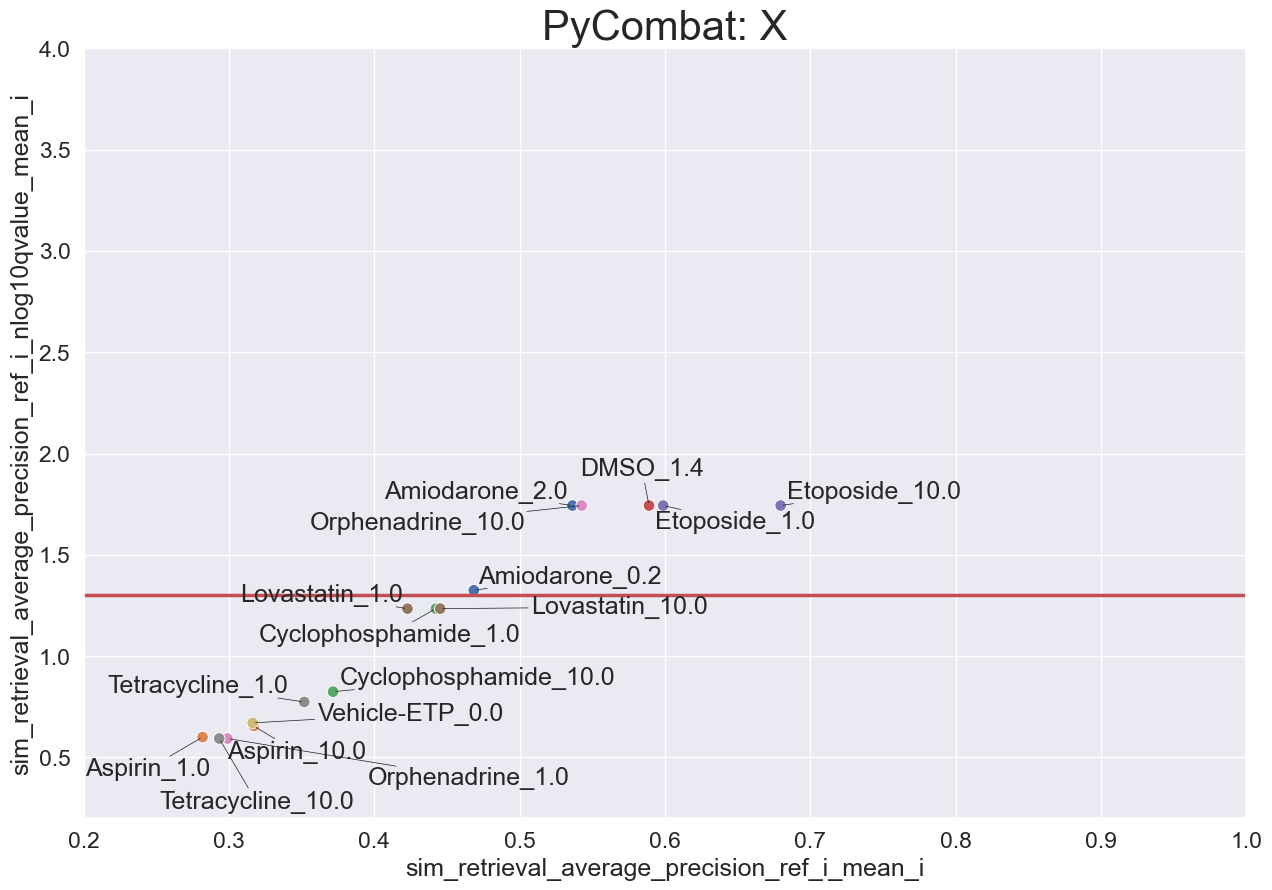

G:\My Drive\2022_09_09_LiveCellPainting_fossa_Cimini\analysis\2022_06_07_DILI\evalzoo_matric\technical_pycombat_perplate


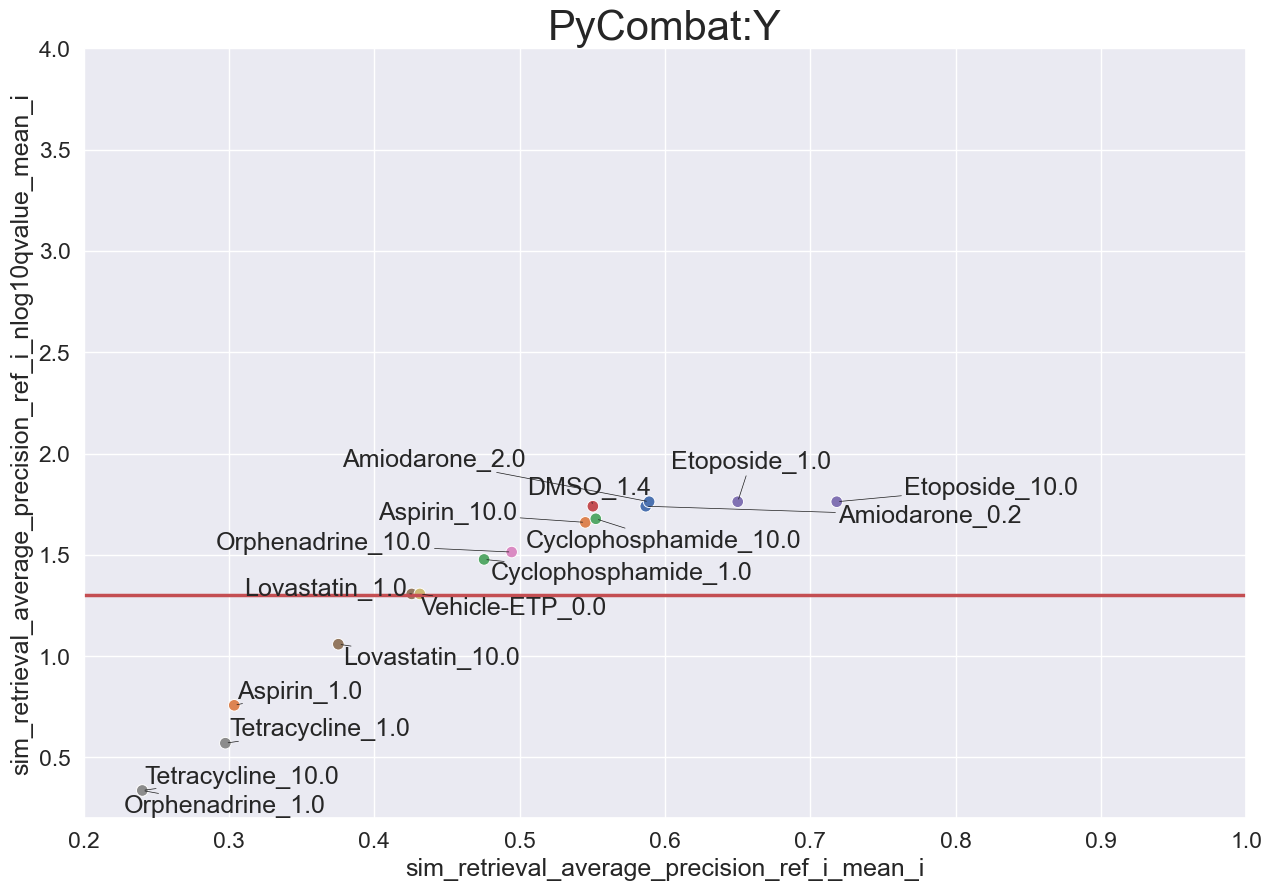

G:\My Drive\2022_09_09_LiveCellPainting_fossa_Cimini\analysis\2022_06_07_DILI\evalzoo_matric\technical_pycombat_percolperplate


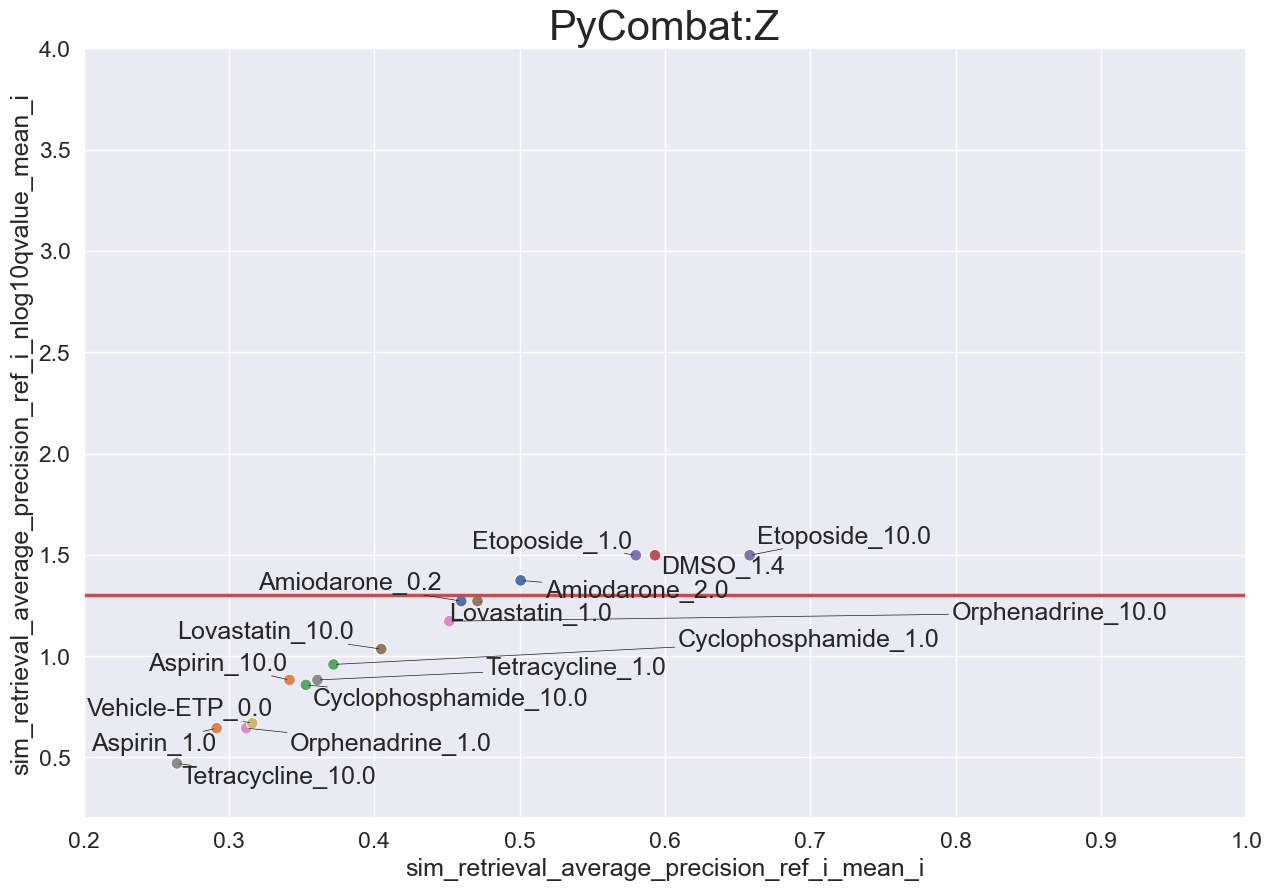

In [3]:
for f in range(len(dirlist)):
    path = os.path.join(root, dirlist[f])
    print(path)
    map_df = pd.read_parquet(path+r"\metrics_level_1_ref.parquet")
    map_df['Metadata_CompoundCnc'] = map_df['Metadata_Compound'] + '_' + map_df['Metadata_Concentration'].astype(str)
    mean_ap_plot.plot_map(map_df, label_column='Metadata_CompoundCnc', title=output[f])